<a href="https://colab.research.google.com/github/bastiansosa/procesamiento-digital/blob/main/procesamientodigital8().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

In [ ]:
img = io.imread("https://upload.wikimedia.org/wikipedia/commons/6/6b/Matr%C3%ADcula_automovil%C3%ADstica_Chile_1963_Valpara%C3%ADso_ES%C2%A7430_Flickr_-_woody1778a.jpg", as_gray=True)

In [ ]:
img.max()

0.9971945098039217

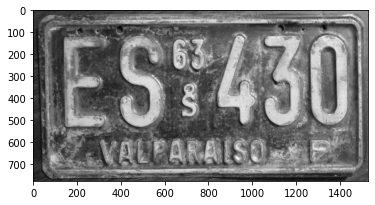

In [ ]:
plt.figure()
plt.imshow(img, cmap="gray")

visualizacion espectro de fourier

In [ ]:
img_fourier = np.fft.fft2(img) #importante trabajr la imgagen con valores entre 0 y 1 
img_fourier_1 = np.fft.fftshift(img_fourier) #valores complejos
img_fourier_2 = np.abs(img_fourier_1) #aplicamos absoluto para extraer modulo de la transformada de fourier
img_fourier_3 = np.log(img_fourier_2) #para resaltar o visualizar componente de baja frecuencia 

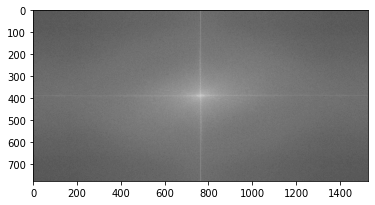

In [ ]:
plt.figure()
plt.imshow(img_fourier_3, cmap="gray")

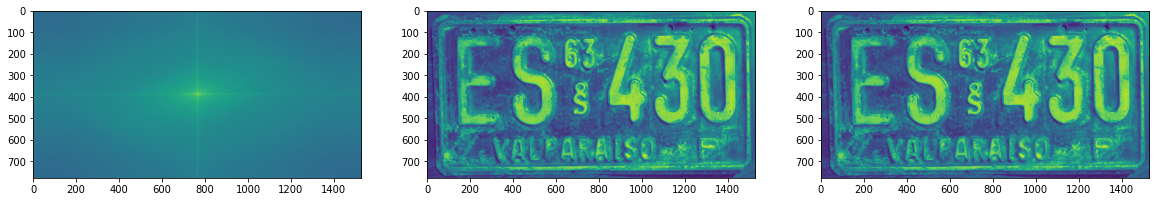

In [ ]:
img_reconstruida = np.fft.ifft2(img_fourier_1) #ifft2 -> funcion inversa a la transformada de fourier 
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(img_fourier_3)
ax[1].imshow(img)
ax[2].imshow(np.abs(img_reconstruida))

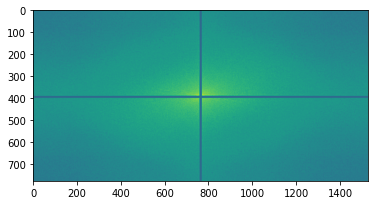

In [ ]:
# modificaciones a img_fourier_1
img_f_1 = img_fourier_1.copy()
img_f_1[390:400,:]=1
img_f_1[:,760:770]=1
plt.figure()
plt.imshow(np.log(np.abs(img_f_1)))

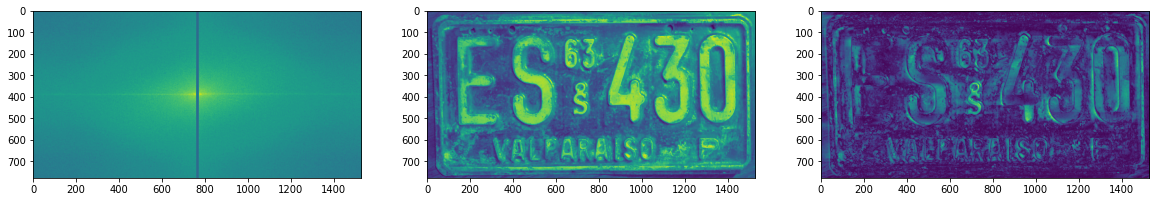

In [ ]:
img_r = np.fft.ifft2(img_f_1) #ifft2 -> funcion inversa a la transformada de fourier 
fig, ax = plt.subplots(1,3,figsize=(20,20))
ax[0].imshow(np.log(np.abs(img_f_1)))
ax[1].imshow(img)
ax[2].imshow(np.abs(img_r))

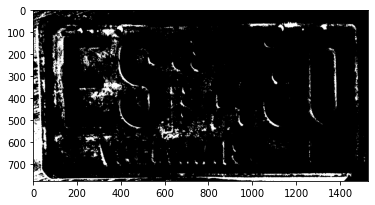

Text(0.5, 1.0, 'original')

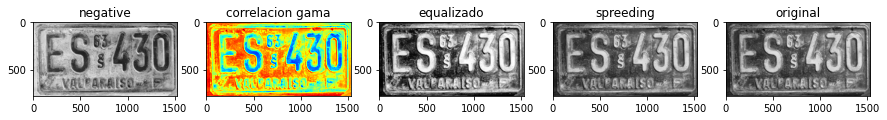

In [ ]:
gama=0.8
fig, ax = plt.subplots(1,5,figsize=(15,15))
#negativo
img_negativo = 255-img
ax[0].imshow(img_negativo,cmap="gray")
ax[0].set_title("negative")

#correlacion del gama
img_gama = img_negativo**gama
ax[1].imshow(img_gama, cmap="jet")
ax[1].set_title("correlacion gama")

#equalizado
nk, k = np.histogram(img.ravel(),bins=range(0,256))
M = img.shape[0]
N = img.shape[1]
pk = nk/(M*N)
Ti = pk.cumsum()

kl = np.round(Ti*255)
img_eq = img.copy()
for i in k:
  if i == k[-1]:
    break
  img_eq[img==i] = kl[i]
img_equalizado = img_eq
ax[2].imshow(img_equalizado, cmap="gray")
ax[2].set_title("equalizado")

#spreeding
ax[3].imshow( (img-img.min()) / img.max()-img.min(), cmap="gray")
ax[3].set_title("spreeding")

#original
ax[4].imshow(img, cmap="gray")
ax[4].set_title("original")

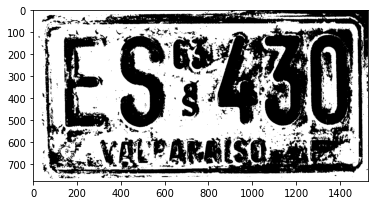

In [ ]:
# Encuentre un umbral optimo para ver claramente los números.
plt.figure()
th = 0.456
plt.imshow(img<th, cmap="gray")